# Homework 9
## Problem 1


From Homework 1, we have the state space model.  



Breaking up the force of the propeller into its large and small signal parts, we have $f_P = F_P + f_p$.  The large signal parts give us $F_f = mg$.  The small signal state equation is $\dot{x}$

$$\begin{equation*}
\mathbf{\dot{x}} = 
\begin{bmatrix}
\dot{v(t)} \\
\dot{h(t)}
\end{bmatrix}
= \begin{bmatrix}
0 && 0 \\
1 && 0
\end{bmatrix}
\begin{bmatrix}
{v(t)} \\
{h(t)}
\end{bmatrix} +
\begin{bmatrix}
1/m \\
0
\end{bmatrix} f_p(t)
\end{equation*}
$$
First we find the step response for the open loop system from $f_P(t)$ to $h(t)$.

In [1]:
pkg load control
pkg load signal
clear all
m = 1 % Assume the mass
A = [[0, 0];[1, 0]]
B = [[1/m; 0]]
C = [0 1]
D = 0


sys = ss(A, B, C, D)
step(sys)
%g = place(sys, [-.1, -.2])
P = tf(sys)
%step(P)

m =  1
A =

   0   0
   1   0

B =

   1
   0

C =

   0   1

D = 0

sys.a =
       x1  x2
   x1   0   0
   x2   1   0

sys.b =
       u1
   x1   1
   x2   0

sys.c =
       x1  x2
   y1   0   1

sys.d =
       u1
   y1   0

Continuous-time model.

Transfer function 'P' from input 'u1' to output ...

       1 
 y1:  ---
      s^2

Continuous-time model.


Note that it blows up (but not exponentially).  This is because with a constant force, we have a constant acceleration which means the height is going up as $t^2$.  So it isn't good without feedback!  This is what would happen if we had a unit step disturbance with no feedback.

Now, let's look at putting a controller in the system. We use the small signal model, and we want the small signal output for $h(t)$ to approach zero quickly.  There can be a small signal disturbance and a small signal noise in our measurement of $h(t)$.  These are incorporated into the model in blue below.  (The black is the original system.)  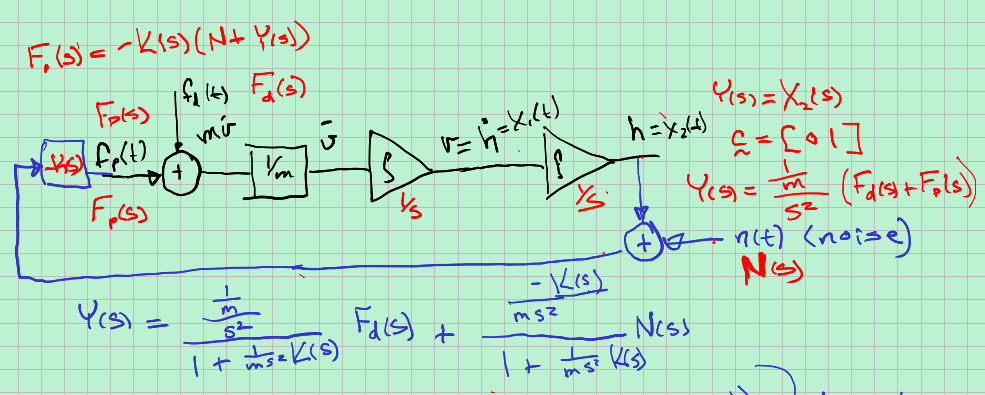

Let's see the disturbance transfer function step response for some possible controllers, $K(s)$.  We want to make $K(s)$ large for low frequencies to make $G_d(s)$ small, but we want $K(s)$ small for large frequencies to make $G_n(s)$ small.  So maybe a solution might be $K(s) = K_{big}/(s/\omega_0 + 1)$ or even  $K_{big}/(s^2 +as + b)$.  You need to be careful how many poles you put into $K(s)$ because each adds a phase delay, and too much delay is going to make the system unstable.  A solution I like is the PD controller, where $K(s) = k_p + k_ds$. 

In [2]:
K = tf([10000, 10000, 10000], [1, 0])  % For PD Controller (Looks like the D is really important for this system.)
%K = tf([10, 10], [1])
%K = tf(100, [1, 1])
%Gd = feedback(P,K)
%Gd = tf([1, 0],[1,0,10,0])  % Check the disturbance tronsfer function and make sure it isn't PK/(1+PK)
Gd = P/(1+P*K)
step(Gd)


Transfer function 'K' from input 'u1' to output ...

      1e+04 s^2 + 1e+04 s + 1e+04
 y1:  ---------------------------
                   s             

Continuous-time model.

Transfer function 'Gd' from input 'u1' to output ...

                        s^3                  
 y1:  ---------------------------------------
      s^5 + 1e+04 s^4 + 1e+04 s^3 + 1e+04 s^2

Continuous-time model.


You can play with $K(s)$ to see the effects.  First we look at the Nyquist plot to see how far from -1, the loop gain is.

In [3]:
L = P*K
grid on
nyquist(L)



Transfer function 'L' from input 'u1' to output ...

      1e+04 s^2 + 1e+04 s + 1e+04
 y1:  ---------------------------
                  s^3            

Continuous-time model.


In [4]:
bode(L)

In [5]:
Gn = -P*K/(1+P*K)
bode(Gn)


Transfer function 'Gn' from input 'u1' to output ...

        -1e+04 s^5 - 1e+04 s^4 - 1e+04 s^3   
 y1:  ---------------------------------------
      s^6 + 1e+04 s^5 + 1e+04 s^4 + 1e+04 s^3

Continuous-time model.


Let's try to see what happens if we change the model a little by adding a viscous friction.  So the system looks like this now:
$$\begin{equation*}
\mathbf{\dot{x}} = 
\begin{bmatrix}
\dot{v(t)} \\
\dot{h(t)}
\end{bmatrix}
= \begin{bmatrix}
-k/m && 0 \\
1 && 0
\end{bmatrix}
\begin{bmatrix}
{v(t)} \\
{h(t)}
\end{bmatrix} +
\begin{bmatrix}
1/m \\
0
\end{bmatrix} f_p(t)
\end{equation*}
$$

Let's try with $ 0.001< k < 0.1 $ N/(m/s), because it is supposed to be small.

k =  0.10000
A =

  -0.10000   0.00000
   1.00000   0.00000

B =

   1
   0

C =

   0   1

D = 0

sys.a =
         x1    x2
   x1  -0.1     0
   x2     1     0

sys.b =
       u1
   x1   1
   x2   0

sys.c =
       x1  x2
   y1   0   1

sys.d =
       u1
   y1   0

Continuous-time model.

Transfer function 'P' from input 'u1' to output ...

           1     
 y1:  -----------
      s^2 + 0.1 s

Continuous-time model.


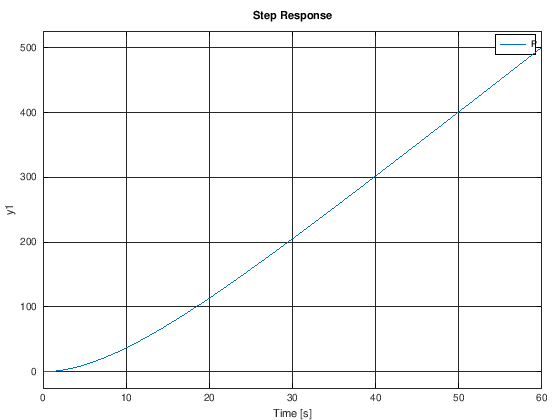

In [12]:
k = 0.1
A = [[-k/m, 0];[1, 0]]
B = [[1/m; 0]]
C = [0 1]
D = 0


sys = ss(A, B, C, D)
%step(sys)
%g = place(sys, [-.1, -.2])
P = tf(sys)
step(P)

Note how the viscous friction makes a terminal velocity.  Now the step response after the controller is installed shows a limited velocity.


Transfer function 'Gd' from input 'u1' to output ...

                         s^3 + 0.1 s^2                    
 y1:  ----------------------------------------------------
      s^5 + 1e+04 s^4 + 1.1e+04 s^3 + 1.1e+04 s^2 + 1000 s

Continuous-time model.


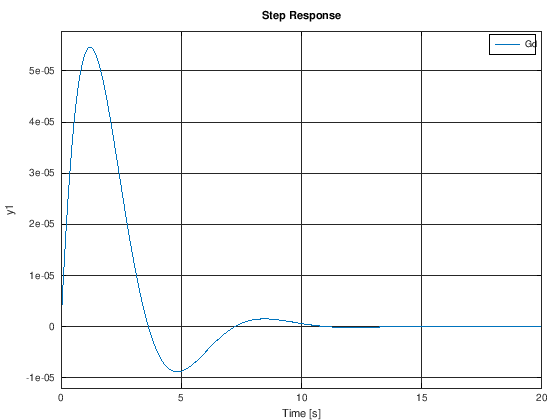

In [13]:
Gd = P/(1+P*K)
step(Gd, 20)